In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [10]:
# more useful libraries
# plots
import matplotlib.pyplot as plt
import seaborn as sns 
# models
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split


In [7]:
cars = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

In [4]:
details = pd.read_csv('../input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
details_v3 = pd.read_csv('../input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [6]:
cars.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
details.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
details_v3.head(5) 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
details_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [14]:
details_v3.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [15]:
list_of_columns = cars.columns

In [16]:
for col in list_of_columns:
    print(cars[col].unique)

<bound method Series.unique of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object>
<bound method Series.unique of 0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64>
<bound method Series.unique of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>
<bound method Series.unique of 0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64>
<bound method Series.unique of 0      27000
1      43000
2       6900
3       5200
4      42450
       ...  
2

In [17]:
print(cars['Seller_Type'].unique())
print(cars['Fuel_Type'].unique())
print(cars['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [18]:
cars1 = cars[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
cars1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
cars1['old'] = 2021 - cars1['Year']
cars1.drop(['Year'], axis = 1, inplace= True)

In [20]:
cars1.head(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [21]:
cars_dummies = pd.get_dummies(cars1,drop_first = True)

In [22]:
cars_dummies.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1


In [23]:
cars_dummies.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [24]:
# base line
X = cars_dummies.iloc[:,1:]
y = cars_dummies.iloc[:,0]

In [25]:
model1 = ExtraTreesRegressor()
model1.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model1.feature_importances_)

[0.40778267 0.04517388 0.00119988 0.07488563 0.20965125 0.01355682
 0.12174802 0.12600184]


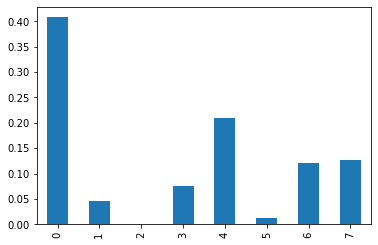

In [27]:
feature_imp = pd.Series(model1.feature_importances_)
feature_imp.nlargest(8).plot(kind = 'bar')
plt.show()

In [28]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape

(240, 8)

In [29]:
# try to hypertune models
from sklearn.model_selection import RandomizedSearchCV
random = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200],
    'max_features': ['auto','sqrt'],
    'max_depth': [5, 40],
    'min_samples_split': [2,5,10,15,100],
    'min_samples_leaf': [1,2,5,10]
}

In [30]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor() 

In [34]:
random_model = RandomizedSearchCV(estimator = modelRF , param_distributions = random, scoring ='neg_mean_squared_error', n_iter = 10, cv= 5)

In [44]:
modelRF.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
predictions = random_model.predict(X_test)

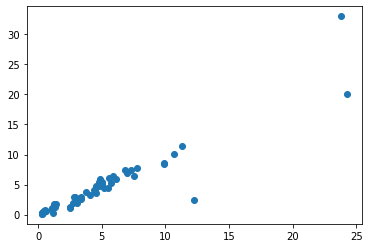

In [37]:
plt.scatter(predictions, y_test)

In [38]:
cat_features = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [39]:
cars1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,old
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
old,-0.236141,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

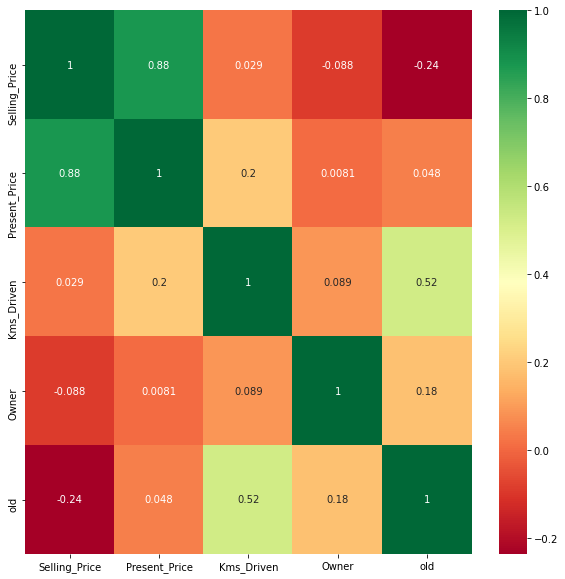

In [41]:
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.heatmap(cars1.corr(), annot=True, cmap='RdYlGn')

In [48]:
# Creation of Random Grid
random_new = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                               param_distributions=random, 
                               scoring='neg_mean_squared_error',
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=43,
                               n_jobs=1)

In [49]:
random_new.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=   1.6s
[CV] n_estimators=800, min_samples_split=2, m

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=43, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
predictions = random_new.predict(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

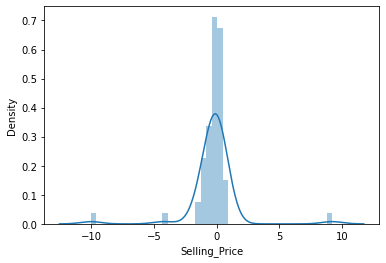

In [51]:
sns.distplot(y_test-predictions)

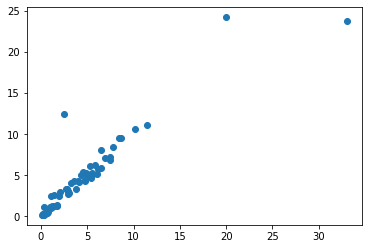

In [52]:
plt.scatter(y_test, predictions)

In [8]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


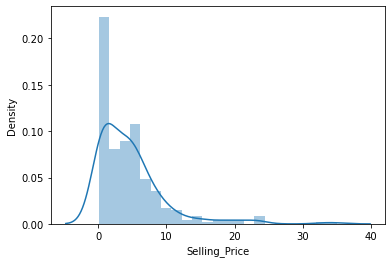

In [14]:
#normalization
norm = cars.dropna(axis=0)
sns.distplot(norm["Selling_Price"])
q = norm["Selling_Price"].quantile(0.999)
df1 = norm[norm["Selling_Price"]<q]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

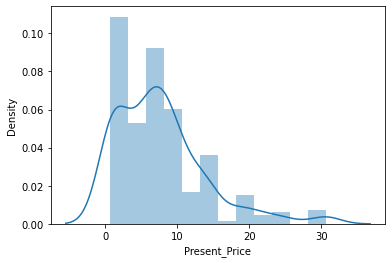

In [15]:
# use quantile for normalization
q2=df1["Present_Price"].quantile(0.99)
q3=df1["Present_Price"].quantile(0.1)
df2=df1[df1["Present_Price"]<q2]
df3=df2[df2["Present_Price"]>q3]
sns.distplot(df3["Present_Price"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

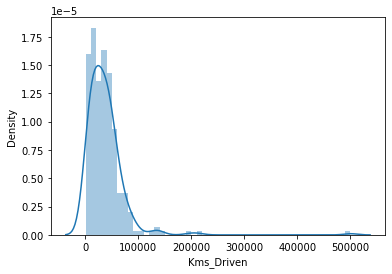

In [18]:
sns.distplot(cars["Kms_Driven"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

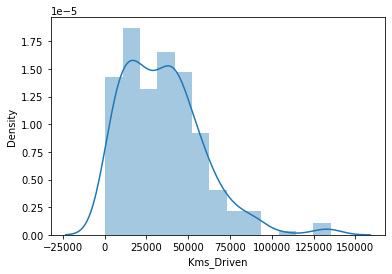

In [21]:
q4 = df3["Kms_Driven"].quantile(0.99)
df4 = df3[df3["Kms_Driven"] < q4]
sns.distplot(df4["Kms_Driven"])

In [24]:
clean = df4
x = clean.drop(["Selling_Price","Car_Name","Year"],axis=1)
y = clean["Selling_Price"]
xdummies = pd.get_dummies(x,drop_first=True)
xdummies["Year"] = clean["Year"]
clean["Selling_Price"] = np.log(clean["Selling_Price"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df3.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.308243,-0.053073,-0.642870,-0.187495
Selling_Price,0.308243,1.000000,0.844840,0.026080,-0.077144
Present_Price,-0.053073,0.844840,1.000000,0.347549,0.063675
Kms_Driven,-0.642870,0.026080,0.347549,1.000000,0.155637
Owner,-0.187495,-0.077144,0.063675,0.155637,1.000000


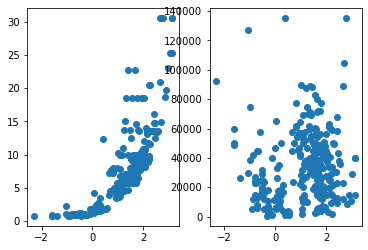

In [29]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
ax1.scatter(clean["Selling_Price"],clean["Present_Price"])
ax2.scatter(clean["Selling_Price"],clean["Kms_Driven"])
plt.show()

In [34]:
#try a linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [35]:
scaler = StandardScaler().fit(xdummies)
ind = scaler.fit(xdummies).transform(xdummies)
xtrain,xtest,ytrain,ytest = train_test_split(ind,y,test_size=0.2,shuffle=False,random_state=42)

In [36]:
reg = LinearRegression()
model_reg = reg.fit(xtrain,ytrain)

In [37]:
coefficeints = model_reg.coef_
intercept = model_reg.intercept_
r_squared = model_reg.score(xtrain,ytrain)
p_values = f_regression(xtrain,ytrain)[1].round(3)
adj_r2=1-(1-r_squared)*(173-1)/172
lst={"coefficeints":coefficeints,"intercept":intercept,"r_squared":r_squared,"pvalues":p_values}
lst

{'coefficeints': array([ 0.5143377 , -0.05912356, -0.00568283,  0.11966678,  0.03762139,
        -0.5609449 ,  0.02301956,  0.28143565]),
 'intercept': 1.0969347692544482,
 'r_squared': 0.9190627298316814,
 'pvalues': array([0.   , 0.015, 0.223, 0.   , 0.   , 0.   , 0.   , 0.   ])}

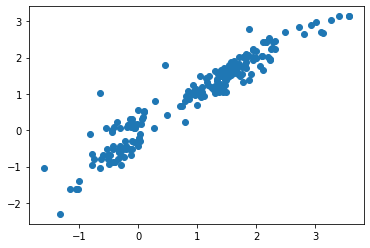

In [39]:
pred = model_reg.predict(xtrain)
plt.scatter(pred,ytrain)

In [40]:
pd.options.display.max_rows=900
ccc = pd.DataFrame({"p":pred,"y":ytrain,"difference":pred-ytrain})
ccc.describe(include="all")

,p,y,difference
count,210.000000,210.000000,2.100000e+02
mean,0.956058,0.956058,-1.929673e-16
std,1.080562,1.127138,3.206648e-01
min,-1.592269,-2.302585,-1.652082e+00
25%,-0.103567,0.060420,-1.932312e-01
50%,1.280765,1.178655,9.290729e-03
75%,1.688392,1.764296,2.183490e-01
max,3.565179,3.135494,9.740860e-01


In [ ]:
tpred = model_reg.predict(xtest)
plt.scatter(ytest,tpred)